Fitting 3 folds for each of 2 candidates, totalling 6 fits
최적의 파라미터: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R² 점수: 0.8254927044030493
최고 모델: RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=42)
최고 R² 점수: {'mean_fit_time': array([0.15890853, 0.30649209]), 'std_fit_time': array([0.018046  , 0.01026771]), 'mean_score_time': array([0.04397527, 0.04231699]), 'std_score_time': array([0.00647641, 0.00803827]), 'param_max_depth': masked_array(data=[8, 8],
             mask=[False, False],
       fill_value=999999), 'param_min_samples_leaf': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value=999999), 'param_min_samples_split': masked_array(data=[2, 2],
             mask=[False, False],
       fill_value=999999), 'param_n_estimators': masked_array(data=[50, 100],
             mask=[False, False],
       fill_value=999999), 'params': [{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5

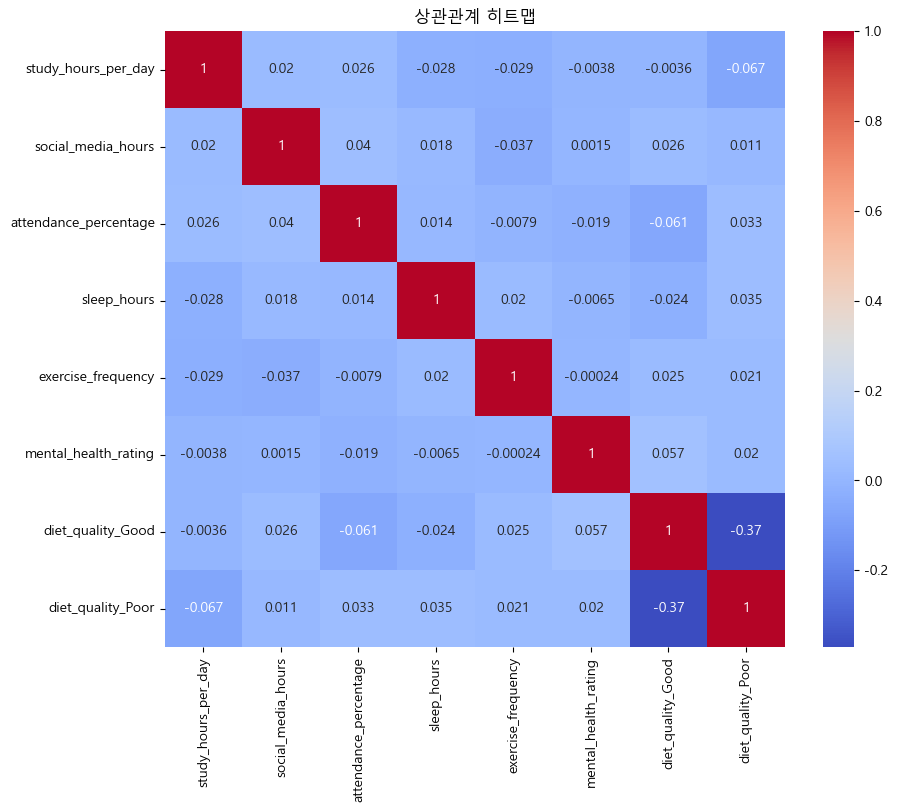

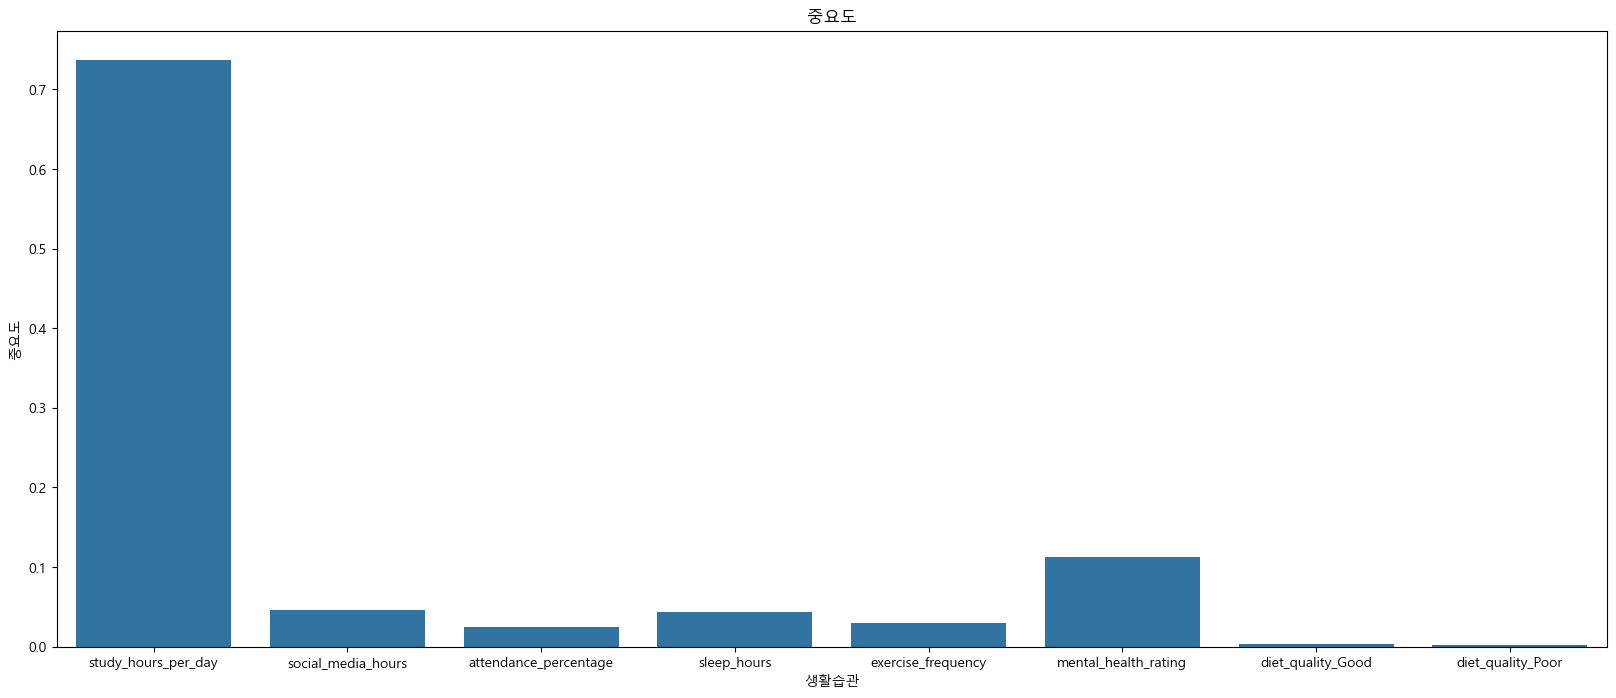

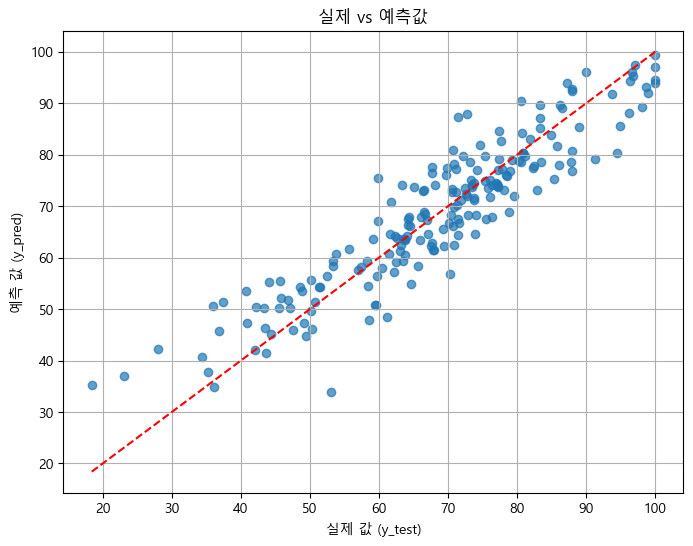

2025-05-27 18:55:03.055 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.059 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-27 18:55:03.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, accuracy_score, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import streamlit as st
import joblib
from ydata_profiling import ProfileReport



# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 데이터 로드
data = pd.read_csv("../dataset/student_habits_performance.csv")
# data.head()
# data.info()

# 데이터 전처리
# 결측값 확인 및 처리
# print(data.isnull().sum())

# 원 핫 인코딩
data = pd.get_dummies(data, columns=['diet_quality'], drop_first=True)
data.head()
# data = data.drop(columns=['student_id', 'age', 'gender']) # 삭제


# 데이터 지정
X = data[['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'diet_quality_Good', 'diet_quality_Poor']]
y = data['exam_score']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 학습 (하이퍼 파라미터 튜닝)
param_grid = {
    'n_estimators' : [50, 100],
    'max_depth' : [8],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1],
}
# model = RandomForestRegressor(random_state=42)
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1), cv=3, param_grid=param_grid, verbose=1, return_train_score=False, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print("최적의 파라미터:", grid.best_params_)
print("R² 점수:", grid.best_score_)
print("최고 모델:", grid.best_estimator_)
print("최고 R² 점수:", grid.cv_results_)
# model.fit(X_train, y_train)
best_model = grid.best_estimator_

# 데이터 예측 (예측용 테스트 데이터)
# 변수를 넣어야 예측을 하겠죠?
y_pred = best_model.predict(X_test)

# 교차 검증을 통한 최적의 모델 찾기
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "KNN": KNeighborsRegressor()
# }
# for x in model.items():
#  score = cross_val_score(model, X, y, cv=5)
 
#  x.fit(X_train, y_train)
 
joblib.dump(best_model, 'best_model.pkl')
 
# 분류 리포트
# 데이터 (성능)평가
# 결과가 잘 나왔는지 평가
ac = r2_score(y_test, y_pred)
print("Accuracy:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# # 프로파일링 리포트 생성
# profile = ProfileReport(
#     data,
#     title="EDA 보고서",
#     explorative=True,
#     html={
#         'style': {
#             'theme': 'united'  # 허용된 theme 중 하나로 변경
#         }
#     }
# )

# # 리포트 저장 및 출력
# profile.to_file("./report/MLproject_report.html")

# 중요도 확인 
importance = pd.DataFrame ({
    
     "특성" : X.columns,
     "중요도" : best_model.feature_importances_

 }).sort_values("중요도" , ascending=False)
print(importance)

# # 데이터 시각화
# # corr = X.corrwith(y).to_frame(name='상관관계')
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

plt.figure(figsize=(20,8))
sns.barplot(x= X.columns, y= best_model.feature_importances_, data=importance)
plt.title('중요도')
plt.xlabel('생활습관')
plt.ylabel('중요도')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("실제 값 (y_test)")
plt.ylabel("예측 값 (y_pred)")
plt.title("실제 vs 예측값")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()

# plt.figure(figsize=(10,10))
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('혼동 행렬')
# plt.xlabel('예측값')
# plt.ylabel('실제값')
# plt.show()


# UI
study_hour = st.slider('study_hours_per_day', min_value=0.00, max_value=10.00)
social_media = st.slider('social_media_hours', min_value=0.00, max_value=10.00)
attendance_percentage = st.slider('attendance_percentage', min_value=0.00, max_value=100.00)
sleep_hour = st.slider('sleep_hours', min_value=0.00, max_value=10.00)
exercise_frequency = st.slider('exercise_frequency', min_value=0.00, max_value=10.00)
mental_health_rating  = st.slider('mental_health_rating', min_value=0.00, max_value=10.00)

if st.button("예측하기"):
    #피클통 불러오기
    best_model = joblib.load('best_model.pkl')
    #데이터 불러오기 (위)
    best_data = np.array([[study_hour, social_media, attendance_percentage, sleep_hour, exercise_frequency, mental_health_rating]])
    #가능성과 확률 예측하기
    prediction = best_model.predict(best_data)[0]
    proba = best_model.predict_proba(best_data)[0]
    #결과 출력
    if prediction == 1:
        st.error(f"성적이 높습니다 , {proba[1] * 100}%")
    else:
        st.success(f"성적이 낮습니다 , {proba[0] * 100}%")
        



# prediction_analysis = pd.DataFrame({
#     'actual': y_test,
#     'predicted': y_pred,
# })
            
# 프로파일링 리포트 생성
profile = ProfileReport(
    data,
    title="EDA 보고서",
    explorative=True,
    html={
        'style': {
            'theme': 'united'  # 허용된 theme 중 하나로 변경
        }
    }
)

# 리포트 저장 및 출력
profile.to_file("../report/project_report.html")
